In [17]:
import matplotlib.pyplot as plt
import re
import math

In [18]:
def get_data(file):
    block_sizes = []
    total_traffic_wb = []
    total_traffic_wt = []
    with open(file, 'r') as f:
        for line in f:
            if "block_size" in line:
                beg = re.search(r"\d", line).start()
                end = line.index("B")
                block_sizes.append(math.log(int(line[beg:end]), 2))
            if "B_total_traffic_wb" in line:
                beg = re.search(r"\d", line).start()
                total_traffic_wb.append(int(line[beg:]))
            if "B_total_traffic_wt" in line:
                beg = re.search(r"\d", line).start()
                total_traffic_wt.append(int(line[beg:]))
    return block_sizes, total_traffic_wb, total_traffic_wt

In [19]:
def plot_wb_wt(x, y, z):
    plt.plot(x, y, color='aqua', label='Total Writeback data')
    plt.plot(x, z, color='hotpink', label='Total Writethrough data')
    plt.xlabel("Block Size (2^x Bytes)")
    plt.ylabel("Bytes")
    plt.title("Block Size vs. Total Writeback/Writethrough Data")
    plt.legend()
    plt.show()

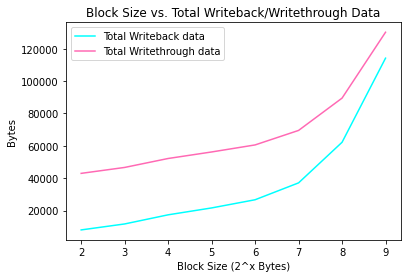

In [20]:
if __name__ == "__main__":
    block_sizes, total_traffic_wb, total_traffic_wt = get_data("log.txt")
    plot_wb_wt(block_sizes, total_traffic_wb, total_traffic_wt)